In [117]:
import h3
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [98]:
df=pd.read_excel('/home/ronaldo/Desktop/Projeto Poluição/Quito/QuitoAmbiente/NO2.xlsx')
dfCoordenates=pd.read_csv('/home/ronaldo/Desktop/Projeto Poluição/Quito/coordenadas/coordenadas.csv',delimiter=';')

In [99]:
df.head()

,Unnamed: 0,BELISARIO,CARAPUNGO,CENTRO,COTOCOLLAO,EL CAMAL,GUAMANI,LOS CHILLOS,TUMBACO,CONDADO,TURUBAMBA,CHILLOGALLO
0,FECHA \ UNIDAD,ug/m3,ug/m3,ug/m3,ug/m3,NaN,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
1,2004-01-01 00:00:00,NaN,NaN,121.37,NaN,108.73,NaN,NaN,NaN,NaN,65.78,NaN
2,2004-01-01 01:00:00,NaN,NaN,82.82,NaN,57.96,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01 02:00:00,NaN,NaN,37.27,NaN,23.88,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01 03:00:00,NaN,NaN,27.22,NaN,16.43,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# unit
df.iloc[0]

Unnamed: 0     FECHA \ UNIDAD
BELISARIO               ug/m3
CARAPUNGO               ug/m3
CENTRO                  ug/m3
COTOCOLLAO              ug/m3
EL CAMAL                  NaN
GUAMANI                 ug/m3
LOS CHILLOS             ug/m3
TUMBACO                 ug/m3
CONDADO                 ug/m3
TURUBAMBA               ug/m3
CHILLOGALLO             ug/m3
Name: 0, dtype: object

In [101]:
# remove first row
df.drop([0],inplace=True)

# Rename column unnamed
df.rename(columns={df.columns[0] :'Date'}, inplace=True )

# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

# convert other columns to numeric
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce', axis=1)

In [102]:
df.head()

,Date,BELISARIO,CARAPUNGO,CENTRO,COTOCOLLAO,EL CAMAL,GUAMANI,LOS CHILLOS,TUMBACO,CONDADO,TURUBAMBA,CHILLOGALLO
1,2004-01-01 00:00:00,NaN,NaN,121.37,NaN,108.73,NaN,NaN,NaN,NaN,65.78,NaN
2,2004-01-01 01:00:00,NaN,NaN,82.82,NaN,57.96,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01 02:00:00,NaN,NaN,37.27,NaN,23.88,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01 03:00:00,NaN,NaN,27.22,NaN,16.43,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-01-01 04:00:00,NaN,NaN,16.72,NaN,9.51,NaN,NaN,NaN,NaN,9.74,NaN


### April 2019

In [103]:
# April 2019
i = pd.date_range('2019-04-01 00:00:00', periods=30, freq='24H')
dfApril2019=df.loc[(df.Date >= i[0]) & (df.Date <= i[-1])]
dfApril2019

,Date,BELISARIO,CARAPUNGO,CENTRO,COTOCOLLAO,EL CAMAL,GUAMANI,LOS CHILLOS,TUMBACO,CONDADO,TURUBAMBA,CHILLOGALLO
133657,2019-04-01 00:00:00,19.39,11.31,27.29,6.88,29.93,14.24,7.08,NaN,NaN,NaN,NaN
133658,2019-04-01 01:00:00,13.80,7.36,17.81,3.63,16.23,12.82,7.12,NaN,NaN,NaN,NaN
133659,2019-04-01 02:00:00,13.06,6.05,13.76,2.93,11.76,12.81,8.43,NaN,NaN,NaN,NaN
133660,2019-04-01 03:00:00,NaN,NaN,14.23,NaN,19.57,12.70,9.57,NaN,NaN,NaN,NaN
133661,2019-04-01 04:00:00,11.78,9.46,18.27,4.35,18.78,21.32,15.92,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
134349,2019-04-29 20:00:00,31.74,28.69,41.27,9.67,41.50,14.61,27.69,NaN,NaN,NaN,NaN
134350,2019-04-29 21:00:00,28.46,28.88,37.25,7.70,36.99,13.85,23.09,NaN,NaN,NaN,NaN
134351,2019-04-29 22:00:00,23.72,26.19,35.52,7.89,34.89,11.60,18.65,NaN,NaN,NaN,NaN
134352,2019-04-29 23:00:00,18.82,25.75,28.14,6.02,31.36,6.00,17.12,NaN,NaN,NaN,NaN


In [104]:
dfApril2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 133657 to 134353
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         697 non-null    datetime64[ns]
 1   BELISARIO    680 non-null    float64       
 2   CARAPUNGO    680 non-null    float64       
 3   CENTRO       558 non-null    float64       
 4   COTOCOLLAO   682 non-null    float64       
 5   EL CAMAL     676 non-null    float64       
 6   GUAMANI      681 non-null    float64       
 7   LOS CHILLOS  683 non-null    float64       
 8   TUMBACO      0 non-null      float64       
 9   CONDADO      0 non-null      float64       
 10  TURUBAMBA    0 non-null      float64       
 11  CHILLOGALLO  0 non-null      float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 70.8 KB


In [105]:
dfApril2019.describe()

,BELISARIO,CARAPUNGO,CENTRO,COTOCOLLAO,EL CAMAL,GUAMANI,LOS CHILLOS,TUMBACO,CONDADO,TURUBAMBA,CHILLOGALLO
count,680.000000,680.000000,558.000000,682.000000,676.000000,681.000000,683.000000,0.0,0.0,0.0,0.0
mean,27.402382,20.299221,31.328351,6.663387,31.681050,19.337137,18.250454,NaN,NaN,NaN,NaN
std,10.660661,10.412734,12.922771,3.276739,12.082923,10.871037,9.937314,NaN,NaN,NaN,NaN
min,6.140000,4.350000,3.650000,1.310000,5.000000,1.310000,2.070000,NaN,NaN,NaN,NaN
25%,19.742500,12.037500,22.570000,3.882500,22.617500,10.900000,11.415000,NaN,NaN,NaN,NaN
50%,26.825000,18.765000,30.355000,6.270000,30.970000,17.650000,16.540000,NaN,NaN,NaN,NaN
75%,34.002500,26.775000,39.770000,8.930000,39.110000,26.630000,22.810000,NaN,NaN,NaN,NaN
max,71.220000,96.590000,66.860000,22.370000,81.770000,55.760000,60.020000,NaN,NaN,NaN,NaN


In [106]:
# Drop TUMBACO, CONDADO, TURUBAMBA E CHILLOGALLO
dfApril2019.drop(columns=['TUMBACO', 'CONDADO', 'TURUBAMBA' ,'CHILLOGALLO'],inplace=True)

/home/ronaldo/anaconda/envs/pyML/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


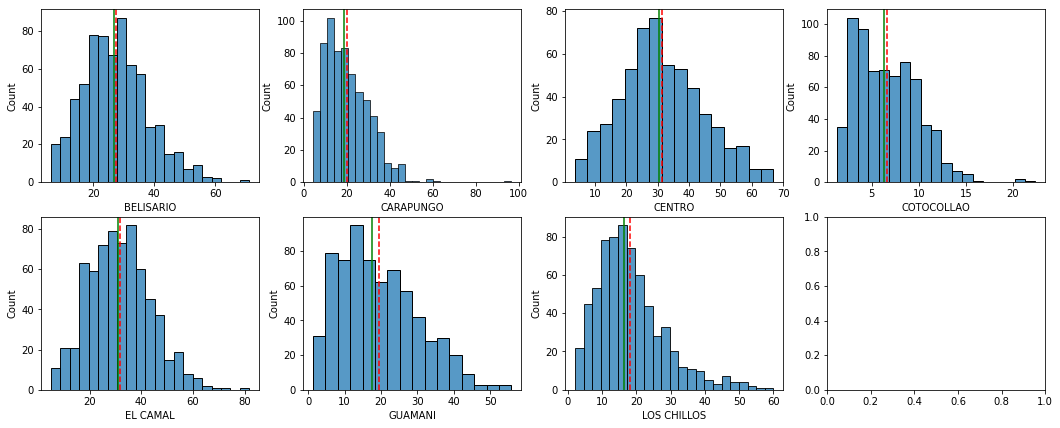

In [107]:
# Plot distributions, mean and median
fig, ax = plt.subplots(2,4,figsize=(18,7))

for index,i in enumerate(dfApril2019.columns[1:]):
    
    
    if index>3:
        idx1=1
        idx2=index-4
    else:
        idx1=0
        idx2=index
        
   
    sns.histplot(data=dfApril2019, x=i,ax=ax[idx1][idx2])
    mean=dfApril2019[i].mean()
    median=dfApril2019[i].median()
    ax[idx1][idx2].axvline(mean, color='r', linestyle='--')
    ax[idx1][idx2].axvline(median, color='g', linestyle='-')



In [108]:
# Create dataframe Quito April 2019
dfQuito2019temp=dfApril2019.describe().transpose()
dfQuito2019temp.drop(columns=['count', 'std', 'min' ,'25%', '50%', '75%' ,'max'],inplace=True)
dfQuito2019temp

,mean
BELISARIO,27.402382
CARAPUNGO,20.299221
CENTRO,31.328351
COTOCOLLAO,6.663387
EL CAMAL,31.681050
GUAMANI,19.337137
LOS CHILLOS,18.250454


In [109]:
# Latitude and Longitude for stations
dfCoordenates['Station'] = dfCoordenates['Station'].str.upper()
dfCoordenates.set_index('Station',inplace=True)
dfCoordenates.drop(['TUMBACO', 'JIPIJAPA'],inplace=True)
dfCoordenates.index.name = None
dfCoordenates

,Latitude,Longitude
CARAPUNGO,-0.092333,-78.441667
BELISARIO,-0.174667,-78.487333
EL CAMAL,-0.250000,-78.506000
CENTRO,-0.218667,-78.506000
GUAMANI,-0.325167,-78.558333
LOS CHILLOS,-0.300000,-78.456000
COTOCOLLAO,-0.110720,-78.499530


In [110]:
# Concatenate dfQuito2019 and dfCoordenates
dfQuito2019 = pd.concat([dfQuito2019temp, dfCoordenates], axis=1)
dfQuito2019

,mean,Latitude,Longitude
BELISARIO,27.402382,-0.174667,-78.487333
CARAPUNGO,20.299221,-0.092333,-78.441667
CENTRO,31.328351,-0.218667,-78.506000
COTOCOLLAO,6.663387,-0.110720,-78.499530
EL CAMAL,31.681050,-0.250000,-78.506000
GUAMANI,19.337137,-0.325167,-78.558333
LOS CHILLOS,18.250454,-0.300000,-78.456000


In [111]:
# convert ug/m3 to ppb
# The conversion assumes an ambient pressure of 1 atmosphere and a temperature of 25 degrees Celsius.
# https://www2.dmu.dk/atmosphericenvironment/expost/database/docs/ppm_conversion.pdf
dfQuito2019['mean']=dfQuito2019['mean']*1.88
dfQuito2019

,mean,Latitude,Longitude
BELISARIO,51.516479,-0.174667,-78.487333
CARAPUNGO,38.162535,-0.092333,-78.441667
CENTRO,58.897300,-0.218667,-78.506000
COTOCOLLAO,12.527168,-0.110720,-78.499530
EL CAMAL,59.560375,-0.250000,-78.506000
GUAMANI,36.353817,-0.325167,-78.558333
LOS CHILLOS,34.310853,-0.300000,-78.456000


In [112]:
# get h3 index
hexagonTemp=[]
for i in range(dfQuito2019.shape[0]):
    # define hexagon
    hexagonTemp.append(h3.geo_to_h3(dfQuito2019.iloc[i]['Latitude'], dfQuito2019.iloc[i]['Longitude'], 9))

In [113]:
# Set hexagon index as index in dataframe
dfQuito2019['temp']=hexagonTemp
dfQuito2019.set_index('temp',inplace=True)
dfQuito2019.drop(columns=['Latitude', 'Longitude'],inplace=True)
dfQuito2019.index.name = None

In [116]:
dfQuito2019.iloc[:,0]

8966d33aaafffff    51.516479
8966d33142fffff    38.162535
8966d338847ffff    58.897300
8966d33a0a7ffff    12.527168
8966d338b67ffff    59.560375
8966d3280cfffff    36.353817
8966d321ecbffff    34.310853
Name: mean, dtype: float64

In [118]:
### Save data in pickle
data={'statistic':'Mean','y':dfQuito2019.iloc[:,0],'pollutant':'NO2'}

filehandler = open("quito2019.p","wb")
pickle.dump(data,filehandler)
filehandler.close()